### Importing the packages.

In [70]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random as rn
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline
from datetime import datetime
from sklearn.metrics import (confusion_matrix, precision_recall_curve)

### List of files required.

In [2]:
files = glob.glob(os.path.join('./NASADefectDataset-master/', "csv_result-PC*.csv"), recursive = True)

In [3]:
files

['./NASADefectDataset-master/csv_result-PC4.csv',
 './NASADefectDataset-master/csv_result-PC2.csv',
 './NASADefectDataset-master/csv_result-PC3.csv',
 './NASADefectDataset-master/csv_result-PC1.csv']

#### Since we have four files, we are going to check the data of each file and if they are consistent, we will obtaine a combined dataframe with data from all the files.

### Obtaining each file data seperately to examine.

In [4]:
df_seperate = []

In [5]:
for i in range(len(files)):
    df_seperate.append(pd.read_csv(files[i]))

In [6]:
df_seperate[0]

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,22,15,9,4,11,26,8,0.22,12,2.17,...,0.11,42,78,23,16,71,1,31.91,36,1
1,7,1,2,0,2,0,1,0.14,0,0.00,...,0.06,8,30,4,10,18,1,22.22,7,0
2,10,3,2,0,2,4,2,0.20,2,2.00,...,0.08,12,25,8,12,24,1,16.67,10,0
3,9,3,2,0,6,4,2,0.20,2,2.00,...,0.07,12,26,8,12,27,1,37.50,10,0
4,3,1,0,0,0,0,1,0.25,0,0.00,...,0.10,4,8,3,7,10,1,0.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0,3,0,0,0,4,2,0.29,2,2.00,...,0.22,17,23,5,7,9,1,0.00,7,0
1454,0,3,0,0,0,4,2,0.33,2,2.00,...,0.25,13,17,5,7,8,1,0.00,6,0
1455,0,1,1,0,0,0,1,0.07,0,0.00,...,0.06,29,76,3,8,17,1,0.00,15,0
1456,1,3,1,0,0,4,2,0.40,2,2.00,...,0.25,10,14,6,10,8,1,0.00,5,0


In [7]:
df_seperate[1]

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,0,7,1,14,0,12,4,0.24,6,2,...,0.20,37,54,9,14,20,1,82.35,17,0
1,0,7,2,14,0,12,4,0.24,6,2,...,0.20,39,56,10,14,20,1,82.35,17,0
2,0,7,0,4,0,12,4,0.80,6,2,...,0.50,6,11,3,7,8,1,80.00,5,0
3,0,3,0,1,0,4,2,1.00,2,2,...,0.50,2,5,2,5,4,1,50.00,2,0
4,0,3,0,1,14,4,2,1.00,2,2,...,0.11,2,5,2,5,18,1,93.75,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5584,0,1,0,1,0,0,1,0.50,0,?,...,0.25,1,3,1,3,4,1,50.00,2,0
5585,0,1,1,1,0,0,1,0.50,0,?,...,0.25,2,4,2,4,4,1,50.00,2,0
5586,0,1,1,0,0,0,1,1.00,0,?,...,1.00,0,0,0,0,1,1,0.00,0,0
5587,0,1,1,0,0,0,1,1.00,0,?,...,1.00,0,0,0,0,1,1,0.00,0,0


In [8]:
df_seperate[2]

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,14,11,4,3,0,20,6,0.23,10,2,...,0.15,51,59,27,15,41,1,11.54,26,0
1,6,3,1,1,3,4,2,0.50,2,2,...,0.14,4,7,4,6,14,1,57.14,4,0
2,3,1,0,0,0,0,1,0.14,0,?,...,0.09,16,18,10,5,11,1,0.00,7,0
3,2,1,1,0,0,0,1,0.50,0,?,...,0.20,3,4,3,4,5,1,0.00,2,0
4,2,1,1,0,0,0,1,0.50,0,?,...,0.20,3,7,3,6,5,1,0.00,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,0,3,0,0,0,4,2,0.25,2,2,...,0.22,23,24,8,8,9,1,0.00,8,0
1559,0,3,0,0,0,4,2,0.29,2,2,...,0.25,17,18,6,8,8,1,0.00,7,0
1560,0,1,1,0,0,0,1,0.06,0,?,...,0.06,73,76,18,8,17,1,0.00,16,0
1561,1,3,1,0,0,4,2,0.33,2,2,...,0.25,10,15,6,11,8,1,0.00,6,0


In [9]:
df_seperate[3]

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,0,5,1,0,0,8,3,0.38,4,2,...,0.33,17,24,5,10,9,1,0.00,8,0
1,1,3,2,0,0,4,2,0.40,2,2,...,0.29,10,10,7,8,7,1,0.00,5,0
2,0,1,0,0,0,0,1,1.00,0,?,...,1.00,0,2,0,2,1,1,0.00,0,0
3,18,19,5,1,58,34,10,0.16,16,2.13,...,0.07,177,215,55,25,138,1,49.58,61,0
4,2,3,0,0,9,4,2,0.20,2,2,...,0.09,33,35,17,7,22,1,47.37,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,6,7,2,2,7,12,4,0.14,6,2,...,0.10,51,57,16,12,42,1,25.71,28,0
1103,4,20,8,2,2,24,12,0.27,12,2,...,0.23,99,122,45,26,52,1,8.51,45,0
1104,4,11,4,0,3,18,6,0.25,8,2.25,...,0.19,52,59,20,15,32,1,11.11,24,0
1105,2,3,1,0,1,4,2,0.29,2,2,...,0.18,9,15,8,10,11,1,12.50,7,0


#### Since all 4 of them have the same columns, let's obtain a united dataframe will the data from the 4 files.

### Obtaining combined data from all files to single dataframe.

In [3]:
df_united = pd.concat(map(pd.read_csv, files))

In [4]:
df_united

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,22,15,9,4,11,26,8,0.22,12,2.17,...,0.11,42,78,23,16,71,1,31.91,36,1
1,7,1,2,0,2,0,1,0.14,0,0,...,0.06,8,30,4,10,18,1,22.22,7,0
2,10,3,2,0,2,4,2,0.20,2,2,...,0.08,12,25,8,12,24,1,16.67,10,0
3,9,3,2,0,6,4,2,0.20,2,2,...,0.07,12,26,8,12,27,1,37.50,10,0
4,3,1,0,0,0,0,1,0.25,0,0,...,0.10,4,8,3,7,10,1,0.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,6,7,2,2,7,12,4,0.14,6,2,...,0.10,51,57,16,12,42,1,25.71,28,0
1103,4,20,8,2,2,24,12,0.27,12,2,...,0.23,99,122,45,26,52,1,8.51,45,0
1104,4,11,4,0,3,18,6,0.25,8,2.25,...,0.19,52,59,20,15,32,1,11.11,24,0
1105,2,3,1,0,1,4,2,0.29,2,2,...,0.18,9,15,8,10,11,1,12.50,7,0


#### Let's get the list of columns and see the unique values in each of them to understand which of the columns are likely to be important in deciding the flawness of a data point.

### Getting the information on the features.

In [6]:
columns = df_united.columns.to_list()

In [13]:
len(columns)

41

In [14]:
columns

['LOC_BLANK',
 'BRANCH_COUNT',
 'CALL_PAIRS',
 'LOC_CODE_AND_COMMENT',
 'LOC_COMMENTS',
 'CONDITION_COUNT',
 'CYCLOMATIC_COMPLEXITY',
 'CYCLOMATIC_DENSITY',
 'DECISION_COUNT',
 'DECISION_DENSITY',
 'DESIGN_COMPLEXITY',
 'DESIGN_DENSITY',
 'EDGE_COUNT',
 'ESSENTIAL_COMPLEXITY',
 'ESSENTIAL_DENSITY',
 'LOC_EXECUTABLE',
 'PARAMETER_COUNT',
 'GLOBAL_DATA_COMPLEXITY',
 'GLOBAL_DATA_DENSITY',
 'HALSTEAD_CONTENT',
 'HALSTEAD_DIFFICULTY',
 'HALSTEAD_EFFORT',
 'HALSTEAD_ERROR_EST',
 'HALSTEAD_LENGTH',
 'HALSTEAD_LEVEL',
 'HALSTEAD_PROG_TIME',
 'HALSTEAD_VOLUME',
 'MAINTENANCE_SEVERITY',
 'MODIFIED_CONDITION_COUNT',
 'MULTIPLE_CONDITION_COUNT',
 'NODE_COUNT',
 'NORMALIZED_CYLOMATIC_COMPLEXITY',
 'NUM_OPERANDS',
 'NUM_OPERATORS',
 'NUM_UNIQUE_OPERANDS',
 'NUM_UNIQUE_OPERATORS',
 'NUMBER_OF_LINES',
 'PATHOLOGICAL_COMPLEXITY',
 'PERCENT_COMMENTS',
 'LOC_TOTAL',
 'Defective']

### Getting the datatype of each column.

In [15]:
df_united.dtypes

LOC_BLANK                            int64
BRANCH_COUNT                         int64
CALL_PAIRS                           int64
LOC_CODE_AND_COMMENT                 int64
LOC_COMMENTS                         int64
CONDITION_COUNT                      int64
CYCLOMATIC_COMPLEXITY                int64
CYCLOMATIC_DENSITY                 float64
DECISION_COUNT                       int64
DECISION_DENSITY                    object
DESIGN_COMPLEXITY                    int64
DESIGN_DENSITY                     float64
EDGE_COUNT                           int64
ESSENTIAL_COMPLEXITY                 int64
ESSENTIAL_DENSITY                  float64
LOC_EXECUTABLE                       int64
PARAMETER_COUNT                      int64
GLOBAL_DATA_COMPLEXITY               int64
GLOBAL_DATA_DENSITY                  int64
HALSTEAD_CONTENT                   float64
HALSTEAD_DIFFICULTY                float64
HALSTEAD_EFFORT                    float64
HALSTEAD_ERROR_EST                 float64
HALSTEAD_LE

#### We see that the datatypes are all either float64 or int64.

### Getting the count of unique values in each column.

In [8]:
unique_values = []

In [9]:
for i in range(len(columns)):
    unique = len(df_united[columns[i]].value_counts())
    unique_values.append(unique)
    print(columns[i], ': ', unique)

LOC_BLANK :  66
BRANCH_COUNT :  87
CALL_PAIRS :  31
LOC_CODE_AND_COMMENT :  81
LOC_COMMENTS :  75
CONDITION_COUNT :  82
CYCLOMATIC_COMPLEXITY :  62
CYCLOMATIC_DENSITY :  85
DECISION_COUNT :  52
DECISION_DENSITY :  108
DESIGN_COMPLEXITY :  41
DESIGN_DENSITY :  93
EDGE_COUNT :  158
ESSENTIAL_COMPLEXITY :  33
ESSENTIAL_DENSITY :  75
LOC_EXECUTABLE :  156
PARAMETER_COUNT :  14
GLOBAL_DATA_COMPLEXITY :  1
GLOBAL_DATA_DENSITY :  1
HALSTEAD_CONTENT :  2675
HALSTEAD_DIFFICULTY :  1640
HALSTEAD_EFFORT :  3721
HALSTEAD_ERROR_EST :  197
HALSTEAD_LENGTH :  544
HALSTEAD_LEVEL :  58
HALSTEAD_PROG_TIME :  3631
HALSTEAD_VOLUME :  2333
MAINTENANCE_SEVERITY :  90
MODIFIED_CONDITION_COUNT :  55
MULTIPLE_CONDITION_COUNT :  80
NODE_COUNT :  132
NORMALIZED_CYLOMATIC_COMPLEXITY :  74
NUM_OPERANDS :  309
NUM_OPERATORS :  386
NUM_UNIQUE_OPERANDS :  144
NUM_UNIQUE_OPERATORS :  51
NUMBER_OF_LINES :  231
PATHOLOGICAL_COMPLEXITY :  1
PERCENT_COMMENTS :  834
LOC_TOTAL :  171
Defective :  2


#### Let's look at  the following 3 features:
* GLOBAL_DATA_COMPLEXITY
* GLOBAL_DATA_DENSITY
* PATHOLOGICAL_COMPLEXITY 
#### They have only one value for all the data points. So we remove them from our features as they are of no use in determining whether a data point is flawed or not.

### Deleting the above listed columns from the dataframe

In [10]:
columns_to_drop = []
for i in range(len(columns)):
    if(unique_values[i] == 1):
        columns_to_drop.append(columns[i])
columns_to_drop

['GLOBAL_DATA_COMPLEXITY', 'GLOBAL_DATA_DENSITY', 'PATHOLOGICAL_COMPLEXITY']

In [11]:
df_united.drop(columns_to_drop, axis = 1, inplace = True) 

In [20]:
df_united

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,22,15,9,4,11,26,8,0.22,12,2.17,...,29,0.11,42,78,23,16,71,31.91,36,1
1,7,1,2,0,2,0,1,0.14,0,0,...,4,0.06,8,30,4,10,18,22.22,7,0
2,10,3,2,0,2,4,2,0.20,2,2,...,9,0.08,12,25,8,12,24,16.67,10,0
3,9,3,2,0,6,4,2,0.20,2,2,...,9,0.07,12,26,8,12,27,37.50,10,0
4,3,1,0,0,0,0,1,0.25,0,0,...,2,0.10,4,8,3,7,10,0.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,6,7,2,2,7,12,4,0.14,6,2,...,15,0.10,51,57,16,12,42,25.71,28,0
1103,4,20,8,2,2,24,12,0.27,12,2,...,38,0.23,99,122,45,26,52,8.51,45,0
1104,4,11,4,0,3,18,6,0.25,8,2.25,...,18,0.19,52,59,20,15,32,11.11,24,0
1105,2,3,1,0,1,4,2,0.29,2,2,...,5,0.18,9,15,8,10,11,12.50,7,0


### Finding the presence of null values in the dataset.

In [21]:
df_united.isnull().sum()

LOC_BLANK                          0
BRANCH_COUNT                       0
CALL_PAIRS                         0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
CYCLOMATIC_DENSITY                 0
DECISION_COUNT                     0
DECISION_DENSITY                   0
DESIGN_COMPLEXITY                  0
DESIGN_DENSITY                     0
EDGE_COUNT                         0
ESSENTIAL_COMPLEXITY               0
ESSENTIAL_DENSITY                  0
LOC_EXECUTABLE                     0
PARAMETER_COUNT                    0
HALSTEAD_CONTENT                   0
HALSTEAD_DIFFICULTY                0
HALSTEAD_EFFORT                    0
HALSTEAD_ERROR_EST                 0
HALSTEAD_LENGTH                    0
HALSTEAD_LEVEL                     0
HALSTEAD_PROG_TIME                 0
HALSTEAD_VOLUME                    0
MAINTENANCE_SEVERITY               0
MODIFIED_CONDITION_COUNT           0
M

In [22]:
df_united.count()

LOC_BLANK                          9717
BRANCH_COUNT                       9717
CALL_PAIRS                         9717
LOC_CODE_AND_COMMENT               9717
LOC_COMMENTS                       9717
CONDITION_COUNT                    9717
CYCLOMATIC_COMPLEXITY              9717
CYCLOMATIC_DENSITY                 9717
DECISION_COUNT                     9717
DECISION_DENSITY                   9717
DESIGN_COMPLEXITY                  9717
DESIGN_DENSITY                     9717
EDGE_COUNT                         9717
ESSENTIAL_COMPLEXITY               9717
ESSENTIAL_DENSITY                  9717
LOC_EXECUTABLE                     9717
PARAMETER_COUNT                    9717
HALSTEAD_CONTENT                   9717
HALSTEAD_DIFFICULTY                9717
HALSTEAD_EFFORT                    9717
HALSTEAD_ERROR_EST                 9717
HALSTEAD_LENGTH                    9717
HALSTEAD_LEVEL                     9717
HALSTEAD_PROG_TIME                 9717
HALSTEAD_VOLUME                    9717


#### Since there are no null/missing values in the dataset, we can proceed further to find out the number of flawed datapoints in the dataset. From this we can understand the distribution of the data.

### Finding count of flawed and unflawed data points.

In [23]:
defective_distribution = df_united['Defective'].value_counts()
defective_distribution

0    9280
1     437
Name: Defective, dtype: int64

#### We see that very few flawed datapoints are present in the data comparatively. Let's find out this percentage to get clearer idea.

### Getting the percentage of flawed datapoints.

In [24]:
percentage_defective = (defective_distribution[1]/defective_distribution[0])*100
print('The percentage of faulty datapoints is: ', percentage_defective, '%')

The percentage of faulty datapoints is:  4.7090517241379315 %


#### Since the percentage of faulty datapoints is less than 5% we can consider them as outliers in the data. 

#### Now we have 37 features to determine whether a datapoint is flawed or not. 
#### Let's try to reduce the number of features by applying different feature selection algorithms.
#### But first let's analyse each feature.

### Since all our data is numeric, let's see the range of values present in each column.

In [25]:
columns = df_united.columns

In [26]:
for i in range(len(columns)):
    df_counts = df_united[columns[i]].value_counts(ascending=True)
    print(df_counts)

79        1
122       1
90        1
225       1
89        1
       ... 
4       259
3       280
2       427
1       741
0      6340
Name: LOC_BLANK, Length: 66, dtype: int64
287       1
74        1
129       1
178       1
81        1
       ... 
9       330
7       528
5       910
3      1421
1      5196
Name: BRANCH_COUNT, Length: 87, dtype: int64
63       1
74       1
42       1
29       1
23       1
25       1
49       1
22       2
17       3
21       4
24       5
18       5
20       6
19       8
15       9
16      10
14      15
11      22
13      26
12      36
10      39
9       73
8      107
7      125
6      154
5      258
4      476
3      738
2     1403
1     2998
0     3188
Name: CALL_PAIRS, dtype: int64
155       1
82        1
106       1
114       1
99        1
       ... 
4       436
3       453
2       890
1      2485
0      4152
Name: LOC_CODE_AND_COMMENT, Length: 81, dtype: int64
91        1
110       1
54        1
45        1
111       1
       ... 
4       216
3       

#### We see the counts of different unique values in each column.
#### To understand the distribution and range of values in each column, let's use describe() on the dataframe.

### Obtaining indetailed information of each feature.

In [27]:
df_united.describe()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
count,9717.000000,9717.000000,9717.000000,9717.000000,9717.000000,9717.000000,9717.00000,9717.000000,9717.000000,9717.000000,...,9717.000000,9717.000000,9717.000000,9717.000000,9717.000000,9717.000000,9717.000000,9717.000000,9717.000000,9717.000000
mean,2.872492,5.286508,1.790367,2.757538,2.617475,6.675929,3.22826,0.464661,3.108573,2.134404,...,10.605537,0.318411,25.806730,36.194093,10.524956,8.775445,20.146753,34.353946,12.278790,0.044973
std,7.521241,12.544250,2.783124,10.344482,7.831274,21.640920,6.57471,0.315599,10.354296,3.837268,...,21.943425,0.300438,79.420616,102.400981,22.291016,6.634274,39.119473,31.604982,26.735153,0.207255
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.240000,0.000000,1.000000,...,3.000000,0.140000,2.000000,5.000000,2.000000,4.000000,4.000000,0.000000,2.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.400000,0.000000,1.000000,...,5.000000,0.250000,6.000000,10.000000,5.000000,7.000000,7.000000,34.780000,4.000000,0.000000
75%,2.000000,5.000000,2.000000,2.000000,1.000000,8.000000,3.00000,0.500000,4.000000,2.000000,...,11.000000,0.330000,24.000000,34.000000,11.000000,12.000000,20.000000,58.330000,13.000000,0.000000
max,225.000000,589.000000,74.000000,558.000000,159.000000,1148.000000,299.00000,8.550000,570.000000,123.000000,...,963.000000,3.000000,4015.000000,5590.000000,787.000000,99.000000,891.000000,99.080000,817.000000,1.000000


#### We see that the range of each column is different and range of few columns is very small and few column values have a very broad range.
#### An Example of the above instance is:
* NUM_OPERATORS: range = [0.000000	, 5590.000000]
* NORMALIZED_CYLOMATIC_COMPLEXITY: range = [0.000000 , 3.000000	]

#### But since we are treating the faulty datapoints as outliers, applying normalization will result in the outliers not being too distinctive from the rest of the data points. So for now, let's proceed without applying any feature scaling.

#### Later we can apply different feature scaling methods and compare the results between when feature scaling is applied and not applied.

### Obtaining scatter plots for each feature.

In [83]:
columns = ['LOC_BLANK',
 'BRANCH_COUNT',
 'CALL_PAIRS',
 'LOC_CODE_AND_COMMENT',
 'LOC_COMMENTS',
 'CONDITION_COUNT',
 'CYCLOMATIC_COMPLEXITY',
 'CYCLOMATIC_DENSITY',
 'DECISION_COUNT',
 'DESIGN_COMPLEXITY',
 'DESIGN_DENSITY',
 'EDGE_COUNT',
 'ESSENTIAL_COMPLEXITY',
 'ESSENTIAL_DENSITY',
 'LOC_EXECUTABLE',
 'PARAMETER_COUNT',
 'HALSTEAD_CONTENT',
 'HALSTEAD_DIFFICULTY',
 'HALSTEAD_EFFORT',
 'HALSTEAD_ERROR_EST',
 'HALSTEAD_LENGTH',
 'HALSTEAD_LEVEL',
 'HALSTEAD_PROG_TIME',
 'HALSTEAD_VOLUME',
 'MAINTENANCE_SEVERITY',
 'MODIFIED_CONDITION_COUNT',
 'MULTIPLE_CONDITION_COUNT',
 'NODE_COUNT',
 'NORMALIZED_CYLOMATIC_COMPLEXITY',
 'NUM_OPERANDS',
 'NUM_OPERATORS',
 'NUM_UNIQUE_OPERANDS',
 'NUM_UNIQUE_OPERATORS',
 'NUMBER_OF_LINES',
 'PERCENT_COMMENTS',
 'LOC_TOTAL',
 'Defective']

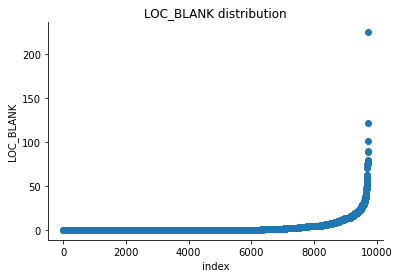

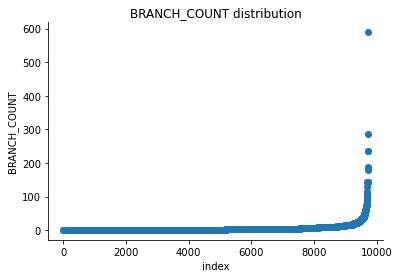

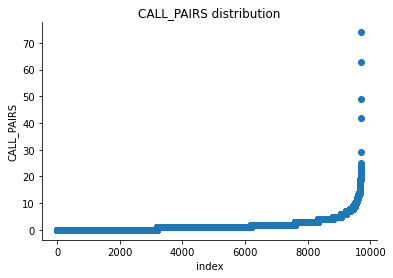

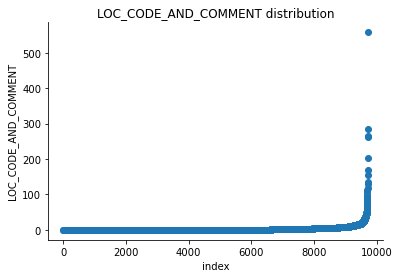

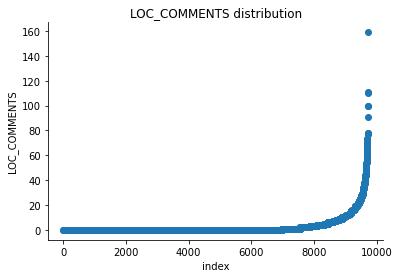

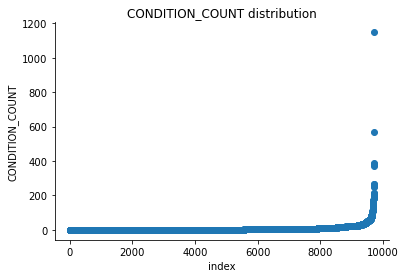

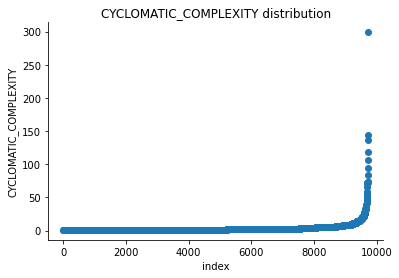

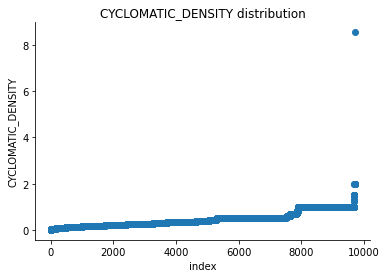

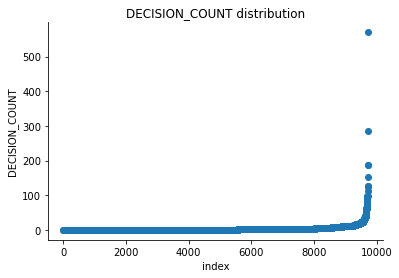

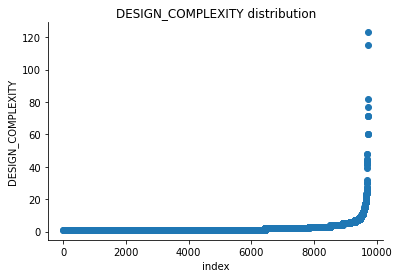

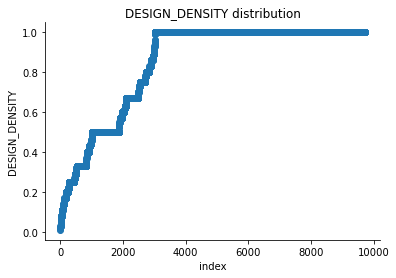

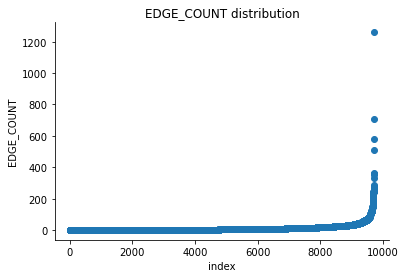

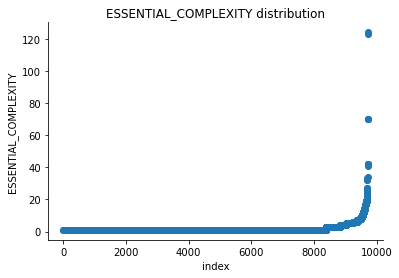

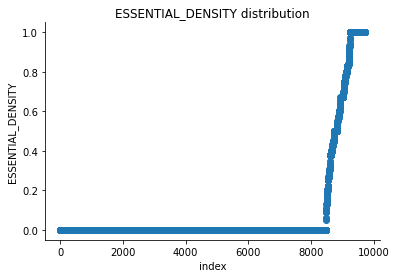

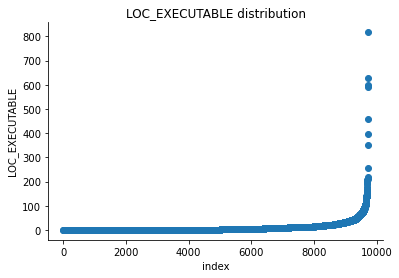

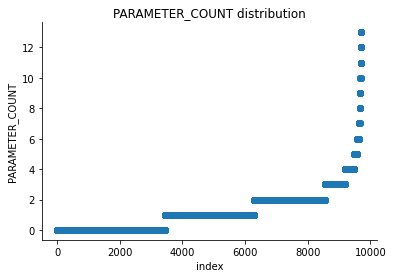

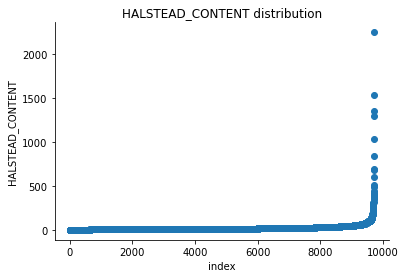

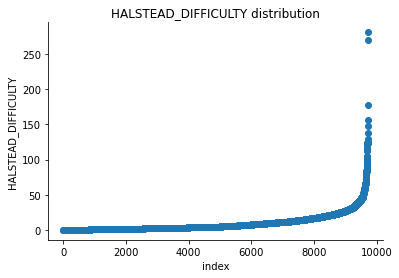

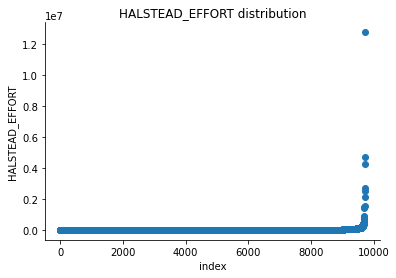

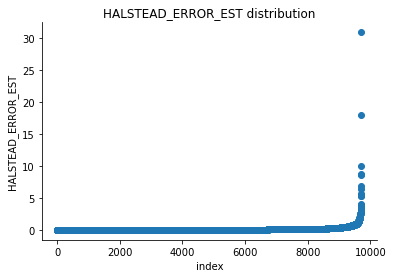

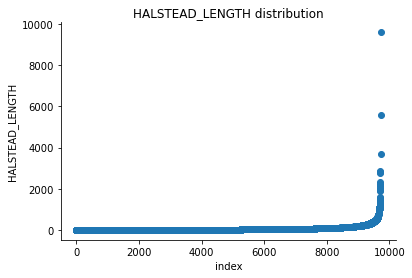

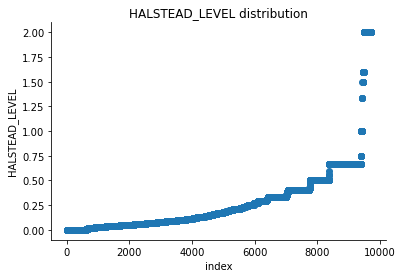

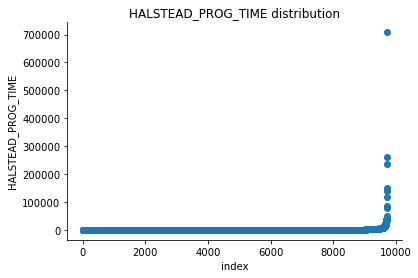

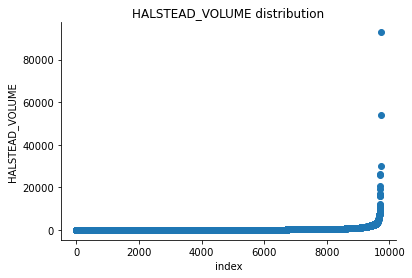

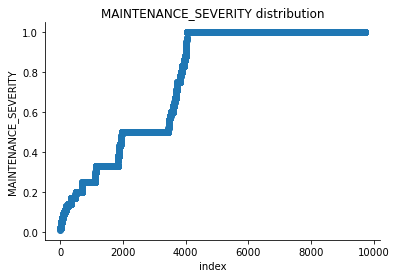

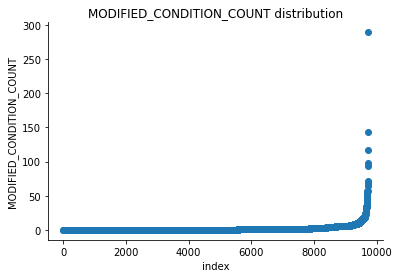

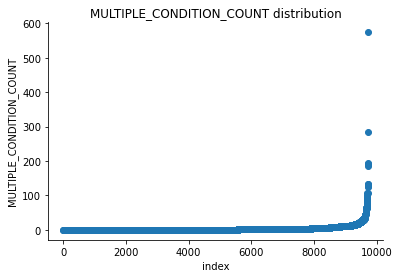

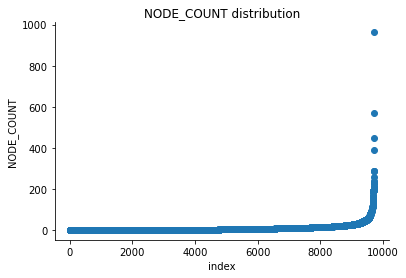

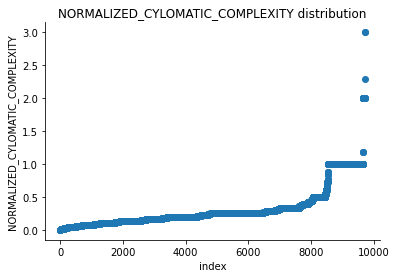

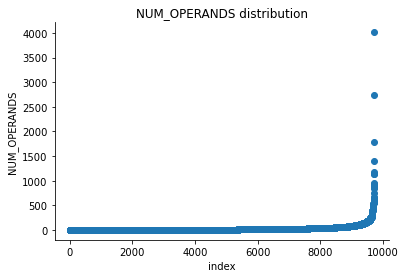

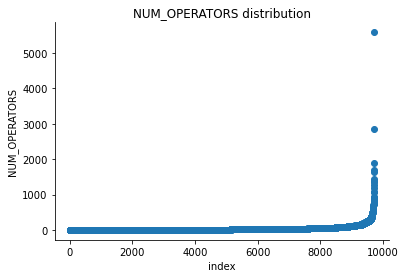

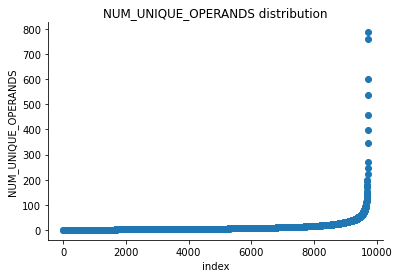

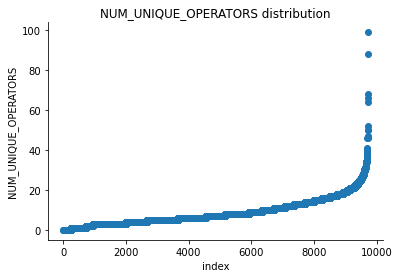

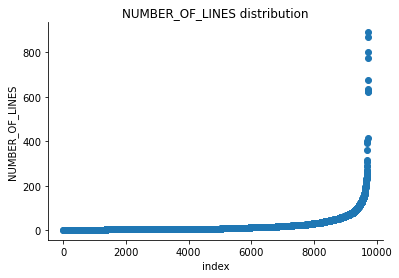

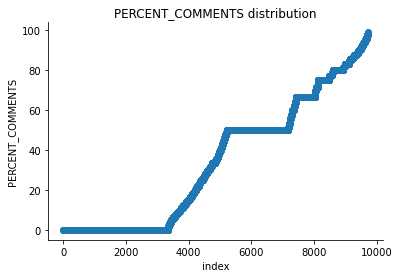

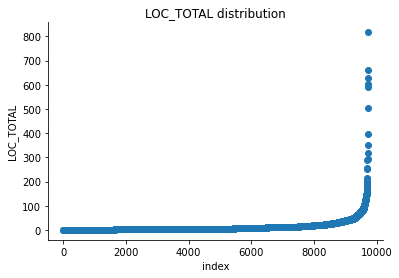

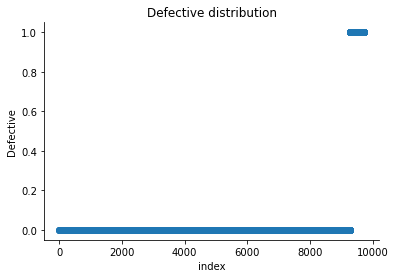

In [77]:
for i in range(len(columns)):
    plt.scatter(range(df_united.shape[0]), np.sort(df_united[columns[i]].values))
    plt.xlabel('index')
    plt.ylabel(columns[i])
    plt.title(columns[i] + " distribution")
    sns.despine()  
    plt.show()
    plt.close()

In [85]:
'''
NOTE: Was facing the following error for DECISION_DENSITY feature:
TypeError: '<' not supported between instances of 'str' and 'float'
when the interpreter runs the following line:
plt.scatter(range(df_united.shape[0]), np.sort(df_united[columns[i]].values))

So plotted the scatter plots for all the features
except DECISION_DENSITY for now.

Also it was previously checked and there are 
no missing values in the column DECISION_DENSITY of the dataframe.
'''

"\nNOTE: Was facing the following error for DECISION_DENSITY feature:\nTypeError: '<' not supported between instances of 'str' and 'float'\nwhen the interpreter runs the following line:\nplt.scatter(range(df_united.shape[0]), np.sort(df_united[columns[i]].values))\n\nSo plotted the scatter plots for all the features\nexcept DECISION_DENSITY for now.\n\nAlso it was previously checked and there are \nno missing values in the column DECISION_DENSITY of the dataframe.\n"

### Obtaining distribution plots

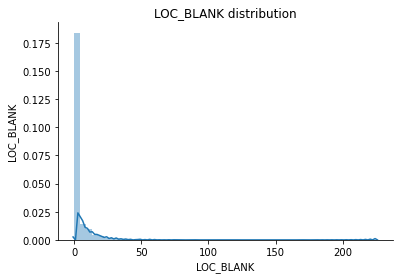

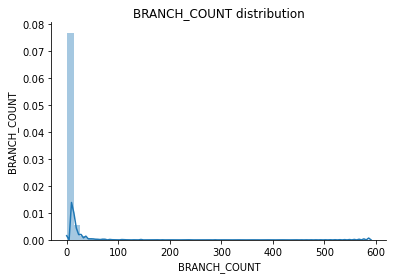

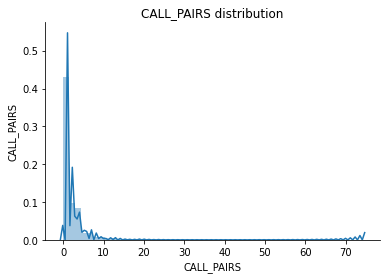

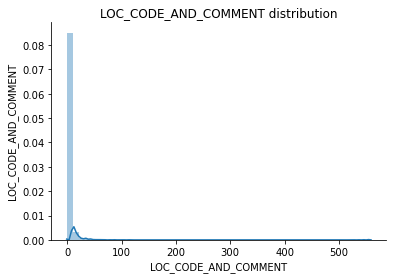

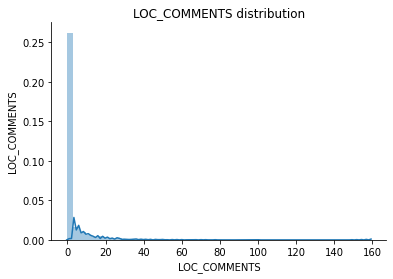

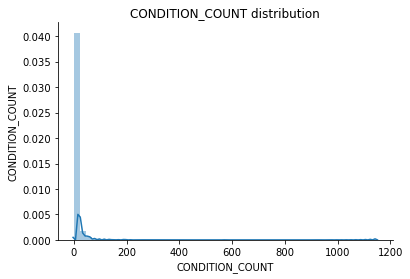

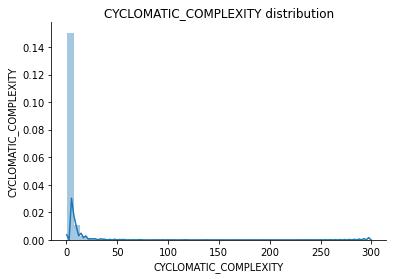

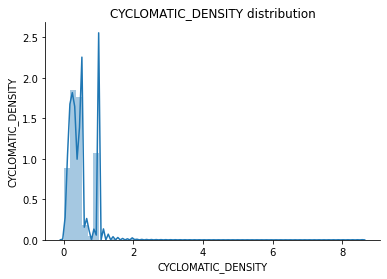

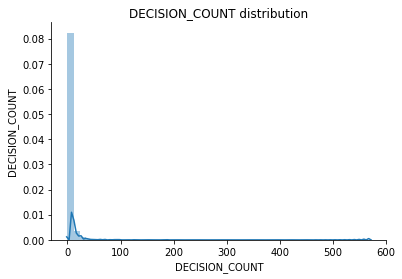

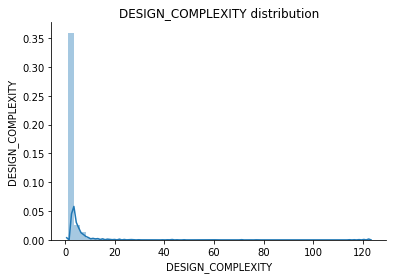

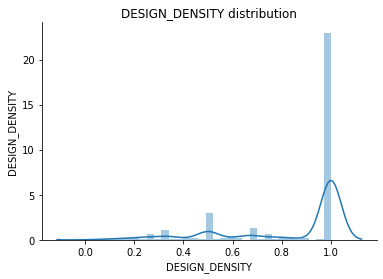

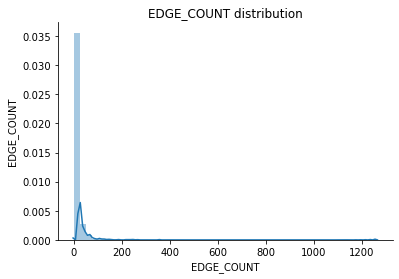

/home/bavanya/Downloads/deb_packages/home/bavanya/Desktop/venv_python/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


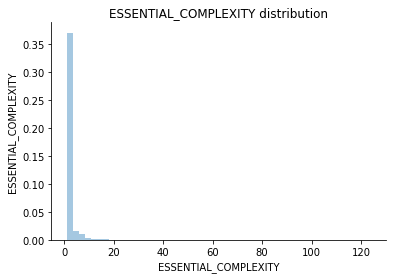

/home/bavanya/Downloads/deb_packages/home/bavanya/Desktop/venv_python/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


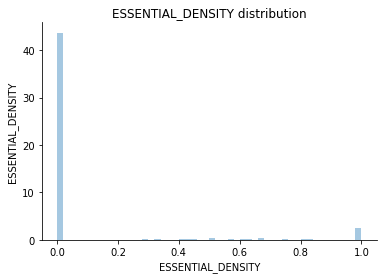

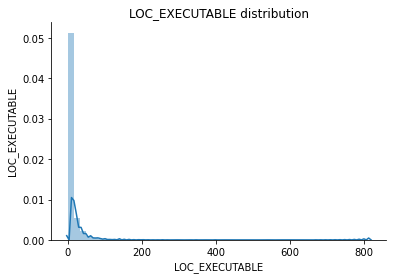

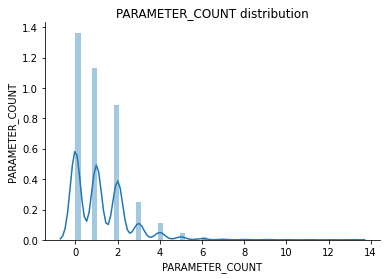

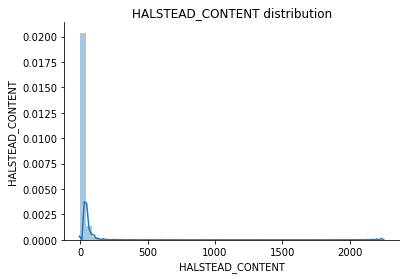

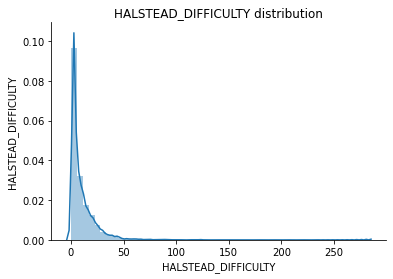

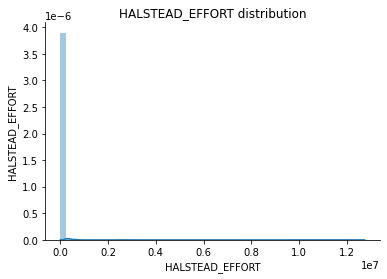

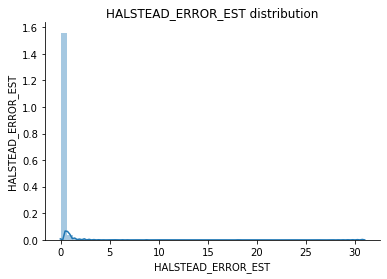

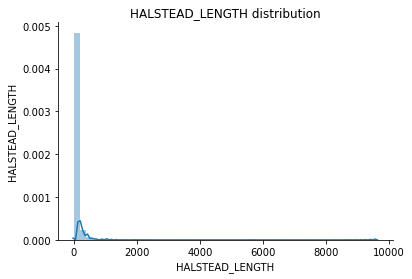

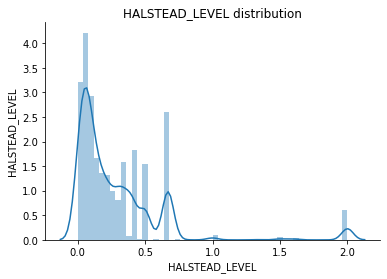

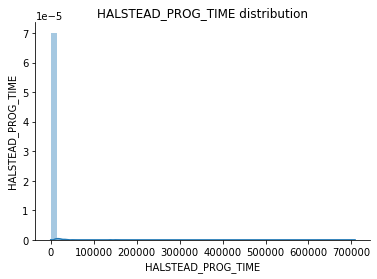

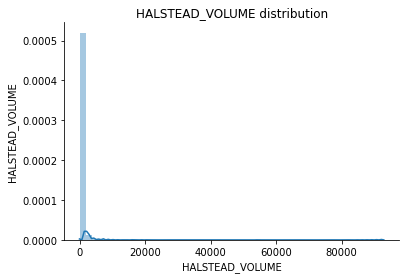

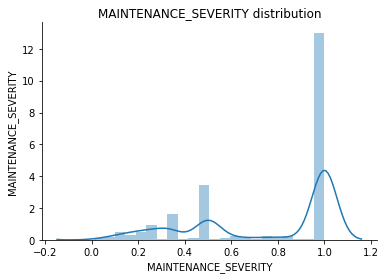

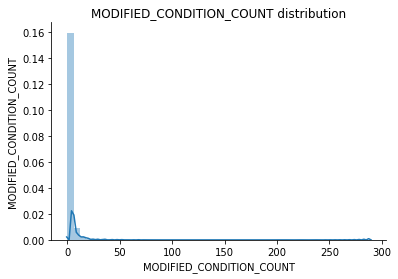

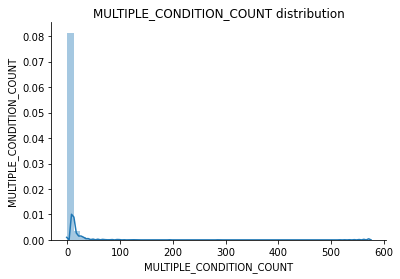

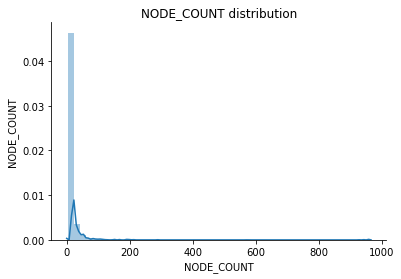

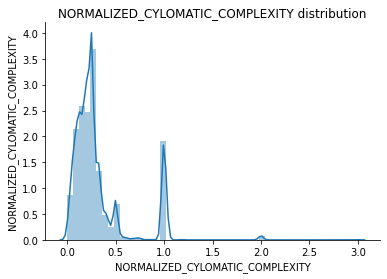

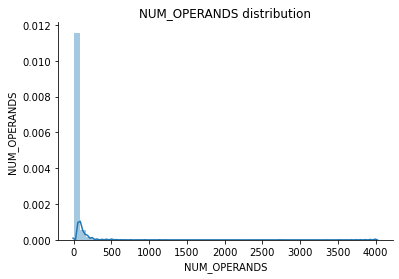

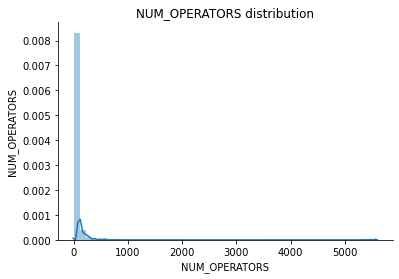

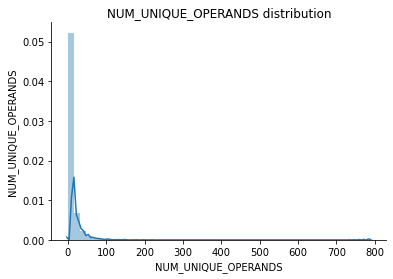

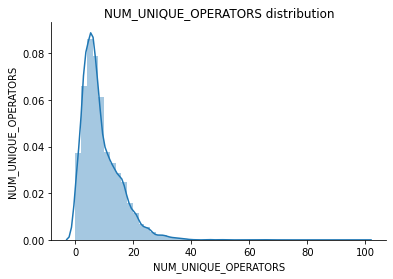

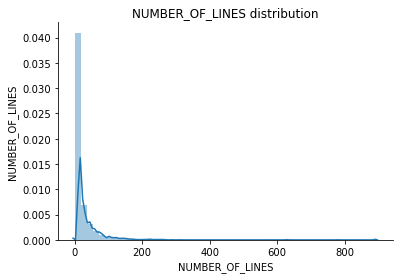

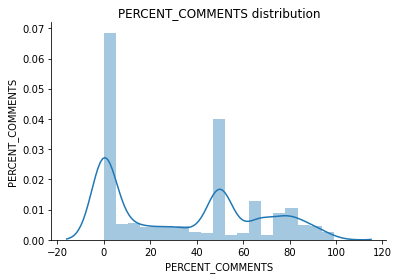

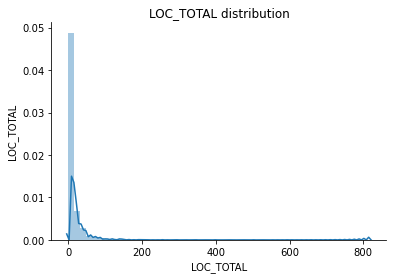

/home/bavanya/Downloads/deb_packages/home/bavanya/Desktop/venv_python/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


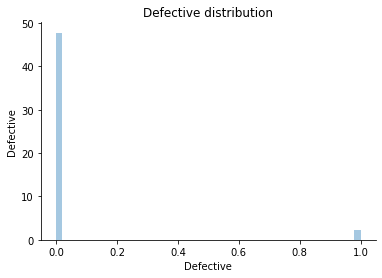

In [84]:
for i in range(len(columns)):
    #plt.scatter(range(df_united.shape[0]), np.sort(df_united[columns[i]].values))
    plt.xlabel('index')
    plt.ylabel(columns[i])
    sns.distplot(df_united[columns[i]])
    plt.title(columns[i] + " distribution")
    sns.despine()  
    plt.show()
    plt.close()

#### From the plots we see that the datapoints with 1 value for Defective feature are easily distinguishable from other features as well.

#### So from the distributions, we can be confident that considering this problem as an unsupervised multivariate fault detection might yield good results.

### Obtaining visualizations using t-SNE which was specifically designed for visualizationg high dimensional data. The dimension of our data is 37.

#### Let's reduce the dimensions of our data to 3 and 2 and obtain visualization of the data taking two clusters: one for faulty data points and another for unflawed datapoints and visualize them.

#### Removing the label column 'Defective' from the df_united_1 dataframe to apply t-sne.

In [119]:
df_united_1 = df_united.drop(['DECISION_DENSITY', 'Defective'], axis = 1) 

In [120]:
df_united_1

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
0,22,15,9,4,11,26,8,0.22,12,5,...,13,29,0.11,42,78,23,16,71,31.91,36
1,7,1,2,0,2,0,1,0.14,0,1,...,0,4,0.06,8,30,4,10,18,22.22,7
2,10,3,2,0,2,4,2,0.20,2,2,...,2,9,0.08,12,25,8,12,24,16.67,10
3,9,3,2,0,6,4,2,0.20,2,2,...,2,9,0.07,12,26,8,12,27,37.50,10
4,3,1,0,0,0,0,1,0.25,0,1,...,0,2,0.10,4,8,3,7,10,0.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,6,7,2,2,7,12,4,0.14,6,2,...,6,15,0.10,51,57,16,12,42,25.71,28
1103,4,20,8,2,2,24,12,0.27,12,5,...,12,38,0.23,99,122,45,26,52,8.51,45
1104,4,11,4,0,3,18,6,0.25,8,4,...,9,18,0.19,52,59,20,15,32,11.11,24
1105,2,3,1,0,1,4,2,0.29,2,2,...,2,5,0.18,9,15,8,10,11,12.50,7


In [97]:
tsne_3d = TSNE(n_components=3)

In [121]:
tsne_2d = TSNE(n_components=2)

In [98]:
TCs_3d = pd.DataFrame(tsne_3d.fit_transform(df_united_1))

In [122]:
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(df_united_1))

In [99]:
TCs_3d

,0,1,2
0,4.846061,-6.130768,-4.002292
1,-11.458178,-7.157949,8.420197
2,-11.766520,-7.355892,8.125178
3,-9.929167,-6.468429,6.470232
4,5.249567,14.370172,16.716339
...,...,...,...
9712,0.662491,-8.508296,-1.769219
9713,-12.941969,21.996038,-0.351274
9714,-5.884740,-10.554369,-7.381989
9715,1.228440,-13.976403,14.198509


In [123]:
TCs_2d

,0,1
0,-44.477745,-45.831989
1,4.898360,67.654739
2,4.983757,67.271439
3,1.050457,65.123459
4,21.858992,20.026320
...,...,...
9712,-39.958187,-40.016701
9713,14.213834,-49.180523
9714,-27.922455,-32.562817
9715,62.034073,3.523479


In [100]:
TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]

In [101]:
TCs_3d

,TC1_3d,TC2_3d,TC3_3d
0,4.846061,-6.130768,-4.002292
1,-11.458178,-7.157949,8.420197
2,-11.766520,-7.355892,8.125178
3,-9.929167,-6.468429,6.470232
4,5.249567,14.370172,16.716339
...,...,...,...
9712,0.662491,-8.508296,-1.769219
9713,-12.941969,21.996038,-0.351274
9714,-5.884740,-10.554369,-7.381989
9715,1.228440,-13.976403,14.198509


In [124]:
TCs_2d.columns = ["TC1_2d","TC2_2d"]

In [125]:
TCs_2d

,TC1_2d,TC2_2d
0,-44.477745,-45.831989
1,4.898360,67.654739
2,4.983757,67.271439
3,1.050457,65.123459
4,21.858992,20.026320
...,...,...
9712,-39.958187,-40.016701
9713,14.213834,-49.180523
9714,-27.922455,-32.562817
9715,62.034073,3.523479


In [106]:
df_united_2 = df_united.copy()
df_united_2.drop(['DECISION_DENSITY'], axis = 1, inplace = True) 
df_united_2

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,22,15,9,4,11,26,8,0.22,12,5,...,29,0.11,42,78,23,16,71,31.91,36,1
1,7,1,2,0,2,0,1,0.14,0,1,...,4,0.06,8,30,4,10,18,22.22,7,0
2,10,3,2,0,2,4,2,0.20,2,2,...,9,0.08,12,25,8,12,24,16.67,10,0
3,9,3,2,0,6,4,2,0.20,2,2,...,9,0.07,12,26,8,12,27,37.50,10,0
4,3,1,0,0,0,0,1,0.25,0,1,...,2,0.10,4,8,3,7,10,0.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,6,7,2,2,7,12,4,0.14,6,2,...,15,0.10,51,57,16,12,42,25.71,28,0
1103,4,20,8,2,2,24,12,0.27,12,5,...,38,0.23,99,122,45,26,52,8.51,45,0
1104,4,11,4,0,3,18,6,0.25,8,4,...,18,0.19,52,59,20,15,32,11.11,24,0
1105,2,3,1,0,1,4,2,0.29,2,2,...,5,0.18,9,15,8,10,11,12.50,7,0


In [126]:
df_united_3 = df_united.copy()
df_united_3.drop(['DECISION_DENSITY'], axis = 1, inplace = True) 
df_united_3

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,22,15,9,4,11,26,8,0.22,12,5,...,29,0.11,42,78,23,16,71,31.91,36,1
1,7,1,2,0,2,0,1,0.14,0,1,...,4,0.06,8,30,4,10,18,22.22,7,0
2,10,3,2,0,2,4,2,0.20,2,2,...,9,0.08,12,25,8,12,24,16.67,10,0
3,9,3,2,0,6,4,2,0.20,2,2,...,9,0.07,12,26,8,12,27,37.50,10,0
4,3,1,0,0,0,0,1,0.25,0,1,...,2,0.10,4,8,3,7,10,0.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,6,7,2,2,7,12,4,0.14,6,2,...,15,0.10,51,57,16,12,42,25.71,28,0
1103,4,20,8,2,2,24,12,0.27,12,5,...,38,0.23,99,122,45,26,52,8.51,45,0
1104,4,11,4,0,3,18,6,0.25,8,4,...,18,0.19,52,59,20,15,32,11.11,24,0
1105,2,3,1,0,1,4,2,0.29,2,2,...,5,0.18,9,15,8,10,11,12.50,7,0


In [107]:
df_united_2 = pd.concat([df_united_2, TCs_3d], axis=1, join='inner')

In [108]:
df_united_2 

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective,TC1_3d,TC2_3d,TC3_3d
0,22,15,9,4,11,26,8,0.22,12,5,...,78,23,16,71,31.91,36,1,4.846061,-6.130768,-4.002292
1,7,1,2,0,2,0,1,0.14,0,1,...,30,4,10,18,22.22,7,0,-11.458178,-7.157949,8.420197
2,10,3,2,0,2,4,2,0.20,2,2,...,25,8,12,24,16.67,10,0,-11.766520,-7.355892,8.125178
3,9,3,2,0,6,4,2,0.20,2,2,...,26,8,12,27,37.50,10,0,-9.929167,-6.468429,6.470232
4,3,1,0,0,0,0,1,0.25,0,1,...,8,3,7,10,0.00,4,0,5.249567,14.370172,16.716339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,6,7,2,2,7,12,4,0.14,6,2,...,57,16,12,42,25.71,28,0,7.416304,0.814606,-15.674797
1103,4,20,8,2,2,24,12,0.27,12,5,...,122,45,26,52,8.51,45,0,7.416304,0.814606,-15.674797
1104,4,11,4,0,3,18,6,0.25,8,4,...,59,20,15,32,11.11,24,0,7.416304,0.814606,-15.674797
1105,2,3,1,0,1,4,2,0.29,2,2,...,15,8,10,11,12.50,7,0,7.416304,0.814606,-15.674797


In [127]:
df_united_3 = pd.concat([df_united_3, TCs_2d], axis=1, join='inner')

In [128]:
df_united_3

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective,TC1_2d,TC2_2d
0,22,15,9,4,11,26,8,0.22,12,5,...,42,78,23,16,71,31.91,36,1,-44.477745,-45.831989
1,7,1,2,0,2,0,1,0.14,0,1,...,8,30,4,10,18,22.22,7,0,4.898360,67.654739
2,10,3,2,0,2,4,2,0.20,2,2,...,12,25,8,12,24,16.67,10,0,4.983757,67.271439
3,9,3,2,0,6,4,2,0.20,2,2,...,12,26,8,12,27,37.50,10,0,1.050457,65.123459
4,3,1,0,0,0,0,1,0.25,0,1,...,4,8,3,7,10,0.00,4,0,21.858992,20.026320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,6,7,2,2,7,12,4,0.14,6,2,...,51,57,16,12,42,25.71,28,0,1.980963,26.525227
1103,4,20,8,2,2,24,12,0.27,12,5,...,99,122,45,26,52,8.51,45,0,1.980963,26.525227
1104,4,11,4,0,3,18,6,0.25,8,4,...,52,59,20,15,32,11.11,24,0,1.980963,26.525227
1105,2,3,1,0,1,4,2,0.29,2,2,...,9,15,8,10,11,12.50,7,0,1.980963,26.525227


In [109]:
cluster0 = df_united_2[df_united_2["Defective"] == 0]
cluster1 = df_united_2[df_united_2["Defective"] == 1]

In [129]:
cluster0_2d = df_united_3[df_united_3["Defective"] == 0]
cluster1_2d = df_united_3[df_united_3["Defective"] == 1]

In [110]:
cluster0

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective,TC1_3d,TC2_3d,TC3_3d
1,7,1,2,0,2,0,1,0.14,0,1,...,30,4,10,18,22.22,7,0,-11.458178,-7.157949,8.420197
2,10,3,2,0,2,4,2,0.20,2,2,...,25,8,12,24,16.67,10,0,-11.766520,-7.355892,8.125178
3,9,3,2,0,6,4,2,0.20,2,2,...,26,8,12,27,37.50,10,0,-9.929167,-6.468429,6.470232
4,3,1,0,0,0,0,1,0.25,0,1,...,8,3,7,10,0.00,4,0,5.249567,14.370172,16.716339
5,9,1,4,0,3,0,1,0.13,0,1,...,15,7,7,22,27.27,8,0,9.297894,-0.955119,14.996127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,6,7,2,2,7,12,4,0.14,6,2,...,57,16,12,42,25.71,28,0,7.416304,0.814606,-15.674797
1103,4,20,8,2,2,24,12,0.27,12,5,...,122,45,26,52,8.51,45,0,7.416304,0.814606,-15.674797
1104,4,11,4,0,3,18,6,0.25,8,4,...,59,20,15,32,11.11,24,0,7.416304,0.814606,-15.674797
1105,2,3,1,0,1,4,2,0.29,2,2,...,15,8,10,11,12.50,7,0,7.416304,0.814606,-15.674797


In [111]:
cluster1

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective,TC1_3d,TC2_3d,TC3_3d
0,22,15,9,4,11,26,8,0.22,12,5,...,78,23,16,71,31.91,36,1,4.846061,-6.130768,-4.002292
6,8,3,4,9,5,4,2,0.11,2,2,...,46,15,13,34,58.33,19,1,2.638042,19.308638,-11.600459
10,4,1,1,1,2,0,1,0.33,0,1,...,8,3,6,11,60.00,3,1,-2.291885,3.306351,-17.705078
11,6,3,1,1,1,4,2,0.12,2,1,...,39,9,11,26,11.11,17,1,4.050372,18.505638,-0.678063
17,6,3,1,1,1,4,2,0.20,2,1,...,40,8,11,19,18.18,10,1,2.510439,16.288929,-1.392158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0,1,2,0,0,0,1,0.17,0,1,...,6,5,4,7,0.00,6,1,6.203891,27.093975,10.082841
1045,0,1,2,0,0,0,1,0.20,0,1,...,6,5,4,6,0.00,5,1,4.987258,27.316578,10.611436
1046,0,1,2,0,0,0,1,0.20,0,1,...,6,5,4,6,0.00,5,1,-18.158247,-5.428483,-0.817403
1047,0,1,2,0,0,0,1,0.20,0,1,...,6,5,4,6,0.00,5,1,7.409279,16.054605,14.636663


In [130]:
cluster0_2d

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective,TC1_2d,TC2_2d
1,7,1,2,0,2,0,1,0.14,0,1,...,8,30,4,10,18,22.22,7,0,4.898360,67.654739
2,10,3,2,0,2,4,2,0.20,2,2,...,12,25,8,12,24,16.67,10,0,4.983757,67.271439
3,9,3,2,0,6,4,2,0.20,2,2,...,12,26,8,12,27,37.50,10,0,1.050457,65.123459
4,3,1,0,0,0,0,1,0.25,0,1,...,4,8,3,7,10,0.00,4,0,21.858992,20.026320
5,9,1,4,0,3,0,1,0.13,0,1,...,8,15,7,7,22,27.27,8,0,39.788002,-10.139806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,6,7,2,2,7,12,4,0.14,6,2,...,51,57,16,12,42,25.71,28,0,1.980963,26.525227
1103,4,20,8,2,2,24,12,0.27,12,5,...,99,122,45,26,52,8.51,45,0,1.980963,26.525227
1104,4,11,4,0,3,18,6,0.25,8,4,...,52,59,20,15,32,11.11,24,0,1.980963,26.525227
1105,2,3,1,0,1,4,2,0.29,2,2,...,9,15,8,10,11,12.50,7,0,1.980963,26.525227


In [131]:
cluster1_2d

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective,TC1_2d,TC2_2d
0,22,15,9,4,11,26,8,0.22,12,5,...,42,78,23,16,71,31.91,36,1,-44.477745,-45.831989
6,8,3,4,9,5,4,2,0.11,2,2,...,23,46,15,13,34,58.33,19,1,-10.621573,-10.670563
10,4,1,1,1,2,0,1,0.33,0,1,...,3,8,3,6,11,60.00,3,1,-11.980707,31.463324
11,6,3,1,1,1,4,2,0.12,2,1,...,17,39,9,11,26,11.11,17,1,-24.846390,19.289335
17,6,3,1,1,1,4,2,0.20,2,1,...,15,40,8,11,19,18.18,10,1,-25.243376,23.271294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0,1,2,0,0,0,1,0.17,0,1,...,5,6,5,4,7,0.00,6,1,-41.048103,-16.049849
1045,0,1,2,0,0,0,1,0.20,0,1,...,5,6,5,4,6,0.00,5,1,-39.759869,-16.815723
1046,0,1,2,0,0,0,1,0.20,0,1,...,5,6,5,4,6,0.00,5,1,10.549249,-27.806147
1047,0,1,2,0,0,0,1,0.20,0,1,...,5,6,5,4,6,0.00,5,1,20.009781,24.820307


In [113]:
trace1 = go.Scatter3d(
                    x = cluster0["TC1_3d"],
                    y = cluster0["TC2_3d"],
                    z = cluster0["TC3_3d"],
                    mode = "markers",
                    name = "Unflawed",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

In [117]:
trace2 = go.Scatter3d(
                    x = cluster1["TC1_3d"],
                    y = cluster1["TC2_3d"],
                    z = cluster1["TC3_3d"],
                    mode = "markers",
                    name = "Flawed",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

In [132]:
trace1_2d = go.Scatter(
                    x = cluster0_2d["TC1_2d"],
                    y = cluster0_2d["TC2_2d"],
                    mode = "markers",
                    name = "Unflawed",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

In [133]:
trace2_2d = go.Scatter(
                    x = cluster1_2d["TC1_2d"],
                    y = cluster1_2d["TC2_2d"],
                    mode = "markers",
                    name = "Flawed",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

In [118]:
data = [trace1, trace2]
title = "Visualizing Clusters in Three Dimensions Using T-SNE"
layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [134]:
data = [trace1_2d, trace2_2d]
title = "Visualizing Clusters in Two Dimensions Using T-SNE"
layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

#### From the visualizations, we understand that reducing the dimensions to 2 and 3 is resulting in a very large loss of information and hence the outliers are not distinctive from the unflaawed data points at all.

#### Hence we can say that reducing the dimensions rigorously is not good in the case of outlier detection.

#### So we need to further experiment to find out the optimal number of dimensions which will help in detecting the outliers. It might also be possible that not reducing the dimensions gives the best results.

#### Now since we are considering the faulty data points as outliers which are to be detected using the features in the data, our problem can now be called as 

### Unsupervised Multivariate anomaly detection.

In [28]:
df_united_unlabelled = df_united.copy()
df_united_unlabelled.drop(['Defective', 'DECISION_DENSITY'], axis = 1, inplace = True) 
df_united_unlabelled

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
0,22,15,9,4,11,26,8,0.22,12,5,...,13,29,0.11,42,78,23,16,71,31.91,36
1,7,1,2,0,2,0,1,0.14,0,1,...,0,4,0.06,8,30,4,10,18,22.22,7
2,10,3,2,0,2,4,2,0.20,2,2,...,2,9,0.08,12,25,8,12,24,16.67,10
3,9,3,2,0,6,4,2,0.20,2,2,...,2,9,0.07,12,26,8,12,27,37.50,10
4,3,1,0,0,0,0,1,0.25,0,1,...,0,2,0.10,4,8,3,7,10,0.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,6,7,2,2,7,12,4,0.14,6,2,...,6,15,0.10,51,57,16,12,42,25.71,28
1103,4,20,8,2,2,24,12,0.27,12,5,...,12,38,0.23,99,122,45,26,52,8.51,45
1104,4,11,4,0,3,18,6,0.25,8,4,...,9,18,0.19,52,59,20,15,32,11.11,24
1105,2,3,1,0,1,4,2,0.29,2,2,...,2,5,0.18,9,15,8,10,11,12.50,7


In [29]:
df_target = pd.DataFrame(df_united['Defective'])

In [30]:
df_target

,Defective
0,1
1,0
2,0
3,0
4,0
...,...
1102,0
1103,0
1104,0
1105,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_united_unlabelled, df_target, test_size=0.2, random_state=42)

In [32]:
X_train

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
3328,0,21,9,21,0,32,11,0.44,12,7,...,16,35,0.39,50,64,19,17,28,84.00,25
1536,1,7,0,0,0,12,4,0.22,6,1,...,6,12,0.20,22,26,16,8,20,0.00,18
4480,0,7,0,1,0,12,4,2.00,6,1,...,6,10,1.00,10,11,3,6,4,50.00,2
4569,0,1,1,2,0,0,1,0.33,0,1,...,0,3,0.20,4,9,2,8,5,66.67,3
3456,0,1,1,0,0,0,1,1.00,0,1,...,0,3,1.00,3,5,3,5,1,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4276,0,1,0,3,0,0,1,0.25,0,1,...,0,2,0.17,4,11,3,7,6,75.00,4
3733,0,3,2,2,0,4,2,0.67,2,2,...,2,8,0.40,8,11,3,8,5,66.67,3
3932,0,3,0,3,1,4,2,0.50,2,1,...,2,6,0.29,8,7,5,6,7,80.00,4
860,5,1,2,0,9,0,1,0.25,0,1,...,0,4,0.05,7,10,7,7,20,69.23,4


In [33]:
y_train

,Defective
3328,0
1536,0
4480,0
4569,0
3456,0
...,...
4276,0
3733,0
3932,0
860,0


In [34]:
X_test

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
4451,0,1,0,1,0,0,1,0.50,0,1,...,0,2,0.25,1,3,1,3,4,50.00,2
2890,0,1,3,3,0,0,1,0.25,0,1,...,0,5,0.17,6,7,5,4,6,75.00,4
1111,2,1,3,0,6,0,1,0.07,0,1,...,0,11,0.04,22,40,12,7,24,30.00,14
597,0,3,2,2,0,4,2,0.67,2,2,...,2,6,0.40,7,10,4,8,5,66.67,3
3685,0,1,1,1,0,0,1,0.50,0,1,...,0,3,0.20,5,6,5,5,5,50.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4936,0,1,0,1,0,0,1,0.50,0,1,...,0,2,0.25,1,3,1,3,4,50.00,2
281,0,3,1,2,0,4,2,0.67,2,2,...,2,6,0.40,5,9,3,8,5,66.67,3
337,0,3,1,0,0,4,2,0.33,2,2,...,2,6,0.29,13,14,6,8,7,0.00,6
336,2,9,1,0,0,14,5,0.63,6,4,...,7,15,0.45,13,25,4,13,11,0.00,8


In [35]:
y_test

,Defective
4451,0
2890,0
1111,0
597,0
3685,0
...,...
4936,0
281,0
337,0
336,0


### Applying isolation forest

In [36]:
isolation_forest_model = IsolationForest(random_state = 42).fit(X_train)

In [37]:
isolation_forest_predictions = pd.DataFrame(isolation_forest_model.predict(X_test))
isolation_forest_predictions.columns = ["Prediced_defective"]
isolation_forest_predictions['scores'] = isolation_forest_model.decision_function(X_test)
isolation_forest_predictions

,Prediced_defective,scores
0,1,0.157243
1,1,0.147088
2,1,0.112913
3,1,0.131686
4,1,0.162532
...,...,...
1939,1,0.157243
1940,1,0.128129
1941,1,0.133524
1942,1,0.049181


####  In the predicted dataframe, anomaly column values are -1 and the corresponding scores are negative.
#### Changing 1 values to 0 and -1 values to 1, so that evaluation of the model can be done.

In [38]:
isolation_forest_predictions['Prediced_defective'] = isolation_forest_predictions['Prediced_defective'].replace([1],0)
isolation_forest_predictions['Prediced_defective'] = isolation_forest_predictions['Prediced_defective'].replace([-1],1)

In [39]:
isolation_forest_predictions

,Prediced_defective,scores
0,0,0.157243
1,0,0.147088
2,0,0.112913
3,0,0.131686
4,0,0.162532
...,...,...
1939,0,0.157243
1940,0,0.128129
1941,0,0.133524
1942,0,0.049181


In [40]:
df_test_predictions_combined = y_test.copy()
df_test_predictions_combined.reset_index(level=0, inplace=True)
df_test_predictions_combined

,index,Defective
0,4451,0
1,2890,0
2,1111,0
3,597,0
4,3685,0
...,...,...
1939,4936,0
1940,281,0
1941,337,0
1942,336,0


In [41]:
df_test_predictions_combined = pd.concat([df_test_predictions_combined, isolation_forest_predictions], axis=1, join='inner')
df_test_predictions_combined['sum'] = df_test_predictions_combined['Defective'] + df_test_predictions_combined['Prediced_defective']
df_test_predictions_combined

,index,Defective,Prediced_defective,scores,sum
0,4451,0,0,0.157243,0
1,2890,0,0,0.147088,0
2,1111,0,0,0.112913,0
3,597,0,0,0.131686,0
4,3685,0,0,0.162532,0
...,...,...,...,...,...
1939,4936,0,0,0.157243,0
1940,281,0,0,0.128129,0
1941,337,0,0,0.133524,0
1942,336,0,0,0.049181,0


In [42]:
df_test_predictions_combined['predicted_minus_predicted'] = df_test_predictions_combined['Defective'] - df_test_predictions_combined['Prediced_defective']
df_test_predictions_combined

,index,Defective,Prediced_defective,scores,sum,predicted_minus_predicted
0,4451,0,0,0.157243,0,0
1,2890,0,0,0.147088,0,0
2,1111,0,0,0.112913,0,0
3,597,0,0,0.131686,0,0
4,3685,0,0,0.162532,0,0
...,...,...,...,...,...,...
1939,4936,0,0,0.157243,0,0
1940,281,0,0,0.128129,0,0
1941,337,0,0,0.133524,0,0
1942,336,0,0,0.049181,0,0


#### Finding the accuracy of the isolation forest model:

In [43]:
true_positives = len(df_test_predictions_combined[df_test_predictions_combined['sum'] == 2])
true_positives

44

In [44]:
true_negatives = len(df_test_predictions_combined[df_test_predictions_combined['sum'] == 0])
true_negatives

1661

In [45]:
all_samples = df_test_predictions_combined.shape[0]
all_samples

1944

In [46]:
false_positives = len(df_test_predictions_combined[df_test_predictions_combined['predicted_minus_predicted'] == -1])
false_positives

180

In [47]:
false_negatives = len(df_test_predictions_combined[df_test_predictions_combined['predicted_minus_predicted'] == 1])
false_negatives

59

In [48]:
print("Accuracy percentage:", 100*(true_positives + true_negatives)/all_samples, '%')

Accuracy percentage: 87.70576131687243 %


### Therefore the accuracy obtained by outlier detection using Isolation Forest for unsupervised learning is 87.70576131687243 % 

### To be noted that we have not applied any feature scaling, feature selection and did not finetune the Isolation Forest model with different hyperparameters.

### Implementing Autoencoder for anomaly detection

In [12]:
df_united

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,22,15,9,4,11,26,8,0.22,12,2.17,...,29,0.11,42,78,23,16,71,31.91,36,1
1,7,1,2,0,2,0,1,0.14,0,0,...,4,0.06,8,30,4,10,18,22.22,7,0
2,10,3,2,0,2,4,2,0.20,2,2,...,9,0.08,12,25,8,12,24,16.67,10,0
3,9,3,2,0,6,4,2,0.20,2,2,...,9,0.07,12,26,8,12,27,37.50,10,0
4,3,1,0,0,0,0,1,0.25,0,0,...,2,0.10,4,8,3,7,10,0.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,6,7,2,2,7,12,4,0.14,6,2,...,15,0.10,51,57,16,12,42,25.71,28,0
1103,4,20,8,2,2,24,12,0.27,12,2,...,38,0.23,99,122,45,26,52,8.51,45,0
1104,4,11,4,0,3,18,6,0.25,8,2.25,...,18,0.19,52,59,20,15,32,11.11,24,0
1105,2,3,1,0,1,4,2,0.29,2,2,...,5,0.18,9,15,8,10,11,12.50,7,0


In [14]:
df_united_1 = df_united.drop(['DECISION_DENSITY'], axis = 1) 
df_united_1

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,22,15,9,4,11,26,8,0.22,12,5,...,29,0.11,42,78,23,16,71,31.91,36,1
1,7,1,2,0,2,0,1,0.14,0,1,...,4,0.06,8,30,4,10,18,22.22,7,0
2,10,3,2,0,2,4,2,0.20,2,2,...,9,0.08,12,25,8,12,24,16.67,10,0
3,9,3,2,0,6,4,2,0.20,2,2,...,9,0.07,12,26,8,12,27,37.50,10,0
4,3,1,0,0,0,0,1,0.25,0,1,...,2,0.10,4,8,3,7,10,0.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,6,7,2,2,7,12,4,0.14,6,2,...,15,0.10,51,57,16,12,42,25.71,28,0
1103,4,20,8,2,2,24,12,0.27,12,5,...,38,0.23,99,122,45,26,52,8.51,45,0
1104,4,11,4,0,3,18,6,0.25,8,4,...,18,0.19,52,59,20,15,32,11.11,24,0
1105,2,3,1,0,1,4,2,0.29,2,2,...,5,0.18,9,15,8,10,11,12.50,7,0


In [15]:
df_without_anomalies = df_united_1[df_united_1['Defective'] == 0] 
df_without_anomalies

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
1,7,1,2,0,2,0,1,0.14,0,1,...,4,0.06,8,30,4,10,18,22.22,7,0
2,10,3,2,0,2,4,2,0.20,2,2,...,9,0.08,12,25,8,12,24,16.67,10,0
3,9,3,2,0,6,4,2,0.20,2,2,...,9,0.07,12,26,8,12,27,37.50,10,0
4,3,1,0,0,0,0,1,0.25,0,1,...,2,0.10,4,8,3,7,10,0.00,4,0
5,9,1,4,0,3,0,1,0.13,0,1,...,6,0.05,8,15,7,7,22,27.27,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,6,7,2,2,7,12,4,0.14,6,2,...,15,0.10,51,57,16,12,42,25.71,28,0
1103,4,20,8,2,2,24,12,0.27,12,5,...,38,0.23,99,122,45,26,52,8.51,45,0
1104,4,11,4,0,3,18,6,0.25,8,4,...,18,0.19,52,59,20,15,32,11.11,24,0
1105,2,3,1,0,1,4,2,0.29,2,2,...,5,0.18,9,15,8,10,11,12.50,7,0


In [16]:
df_with_anomalies = df_united_1[df_united_1['Defective'] == 1] 
df_with_anomalies

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,22,15,9,4,11,26,8,0.22,12,5,...,29,0.11,42,78,23,16,71,31.91,36,1
6,8,3,4,9,5,4,2,0.11,2,2,...,8,0.06,23,46,15,13,34,58.33,19,1
10,4,1,1,1,2,0,1,0.33,0,1,...,3,0.09,3,8,3,6,11,60.00,3,1
11,6,3,1,1,1,4,2,0.12,2,1,...,7,0.08,17,39,9,11,26,11.11,17,1
17,6,3,1,1,1,4,2,0.20,2,1,...,6,0.11,15,40,8,11,19,18.18,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0,1,2,0,0,0,1,0.17,0,1,...,4,0.14,5,6,5,4,7,0.00,6,1
1045,0,1,2,0,0,0,1,0.20,0,1,...,4,0.17,5,6,5,4,6,0.00,5,1
1046,0,1,2,0,0,0,1,0.20,0,1,...,4,0.17,5,6,5,4,6,0.00,5,1
1047,0,1,2,0,0,0,1,0.20,0,1,...,4,0.17,5,6,5,4,6,0.00,5,1


In [19]:
df_without_anomalies_shuffle = df_without_anomalies.sample(frac=1).reset_index(drop=True)
df_without_anomalies_shuffle

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,0,3,0,3,0,4,2,0.50,2,1,...,6,0.33,6,12,5,8,6,75.00,4,0
1,0,1,1,0,0,0,1,1.00,0,1,...,3,0.33,2,1,2,1,3,0.00,1,0
2,0,3,0,1,0,4,2,1.00,2,1,...,6,0.50,4,5,2,5,4,50.00,2,0
3,0,12,9,18,2,12,8,0.40,6,7,...,22,0.33,20,43,15,17,24,90.91,20,0
4,0,3,2,4,0,4,2,0.40,2,2,...,7,0.29,6,10,5,8,7,80.00,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,3,9,1,2,7,16,5,0.16,8,4,...,20,0.12,37,51,20,15,43,23.08,32,0
9276,7,5,3,0,8,8,3,0.19,4,2,...,11,0.09,28,33,13,13,32,33.33,16,0
9277,0,1,1,1,0,0,1,0.50,0,1,...,3,0.20,3,6,3,6,5,50.00,2,0
9278,0,1,1,1,0,0,1,0.50,0,1,...,3,0.25,2,4,2,4,4,50.00,2,0


In [25]:
TRAINING_SAMPLE = 7774
RANDOM_SEED = 42
VALIDATE_SIZE = 0.2

In [22]:
X_train = df_without_anomalies_shuffle.iloc[:TRAINING_SAMPLE].drop('Defective', axis=1)
X_train

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
0,0,3,0,3,0,4,2,0.50,2,1,...,2,6,0.33,6,12,5,8,6,75.00,4
1,0,1,1,0,0,0,1,1.00,0,1,...,0,3,0.33,2,1,2,1,3,0.00,1
2,0,3,0,1,0,4,2,1.00,2,1,...,2,6,0.50,4,5,2,5,4,50.00,2
3,0,12,9,18,2,12,8,0.40,6,7,...,6,22,0.33,20,43,15,17,24,90.91,20
4,0,3,2,4,0,4,2,0.40,2,2,...,2,7,0.29,6,10,5,8,7,80.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7769,0,1,1,2,0,0,1,0.33,0,1,...,0,3,0.20,2,7,2,6,5,66.67,3
7770,0,15,2,21,0,28,8,0.32,14,5,...,14,26,0.29,20,37,5,13,28,84.00,25
7771,0,5,3,6,0,8,3,0.38,4,3,...,4,9,0.30,10,15,9,8,10,75.00,8
7772,0,1,0,0,0,0,1,1.00,0,1,...,0,2,1.00,0,2,0,2,1,0.00,0


In [23]:
X_test = df_without_anomalies_shuffle.iloc[TRAINING_SAMPLE:].append(df_with_anomalies).sample(frac=1)
X_test 

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
9229,0,1,1,2,0,0,1,0.33,0,1,...,3,0.20,3,7,2,6,5,66.67,3,0
8893,1,5,2,0,0,8,3,0.43,4,3,...,12,0.33,21,27,11,9,9,0.00,7,0
8116,0,3,2,4,0,4,2,0.40,2,2,...,7,0.29,6,10,5,7,7,80.00,5,0
9098,0,1,2,1,0,0,1,0.50,0,1,...,4,0.20,5,6,4,4,5,50.00,2,0
7941,0,3,1,4,8,4,2,0.33,2,1,...,7,0.13,12,13,7,9,16,85.71,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8538,0,9,6,17,4,12,5,0.24,6,5,...,21,0.19,22,46,15,15,27,84.00,21,0
8639,0,3,6,32,7,4,2,0.06,2,2,...,33,0.04,61,77,35,7,46,92.86,35,0
5398,0,1,0,1,0,0,1,0.50,0,1,...,2,0.25,3,7,2,6,4,50.00,2,1
8706,13,1,3,1,15,0,1,0.09,0,1,...,6,0.03,21,23,15,6,40,61.54,11,0


In [26]:
X_train, X_validate = train_test_split(X_train, 
                                       test_size=VALIDATE_SIZE, 
                                       random_state=RANDOM_SEED)

In [38]:
X_train

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
5845,0,1,0,3,0,0,1,0.25,0,1,...,0,2,0.17,4,11,3,7,6,75.00,4
2570,14,9,3,5,27,16,5,0.23,8,4,...,8,16,0.08,39,55,20,20,66,65.31,22
3939,0,1,1,1,0,0,1,0.50,0,1,...,0,3,0.25,1,5,1,5,4,50.00,2
6762,0,1,0,1,0,0,1,0.50,0,1,...,0,2,0.25,1,3,1,3,4,50.00,2
3774,0,7,0,1,0,12,4,2.00,6,1,...,6,10,1.00,10,11,3,6,4,50.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,0,1,1,2,2,0,1,0.33,0,1,...,0,3,0.14,3,7,3,5,7,80.00,3
5390,0,1,1,2,0,0,1,0.33,0,1,...,0,3,0.25,5,8,5,6,4,66.67,3
860,0,1,1,3,0,0,1,0.25,0,1,...,0,3,0.20,9,12,9,6,5,75.00,4
7603,10,5,0,0,5,8,3,0.14,4,1,...,4,10,0.08,61,62,20,8,38,18.52,22


In [31]:
X_validate

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
1421,0,1,0,0,0,0,1,1.00,0,1,...,0,2,1.00,1,7,1,6,1,0.00,0
2748,0,3,0,0,0,4,2,1.00,2,1,...,2,5,1.00,3,5,2,5,2,0.00,0
3475,8,1,0,0,6,0,1,0.07,0,1,...,0,2,0.03,28,43,2,4,30,28.57,15
4852,0,1,1,1,0,0,1,0.50,0,1,...,0,3,0.25,2,4,2,4,4,50.00,2
3002,5,12,9,0,1,4,10,0.24,2,9,...,2,18,0.13,47,72,32,22,76,2.38,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5540,0,1,1,2,0,0,1,0.25,0,1,...,0,3,0.17,5,4,2,2,6,50.00,4
904,0,1,0,0,0,0,1,1.00,0,1,...,0,2,1.00,1,3,1,3,1,0.00,0
1446,0,1,1,0,0,0,1,1.00,0,1,...,0,3,1.00,3,5,3,5,1,0.00,0
7289,1,5,1,0,0,8,3,0.38,4,2,...,4,9,0.30,11,17,7,13,10,0.00,8


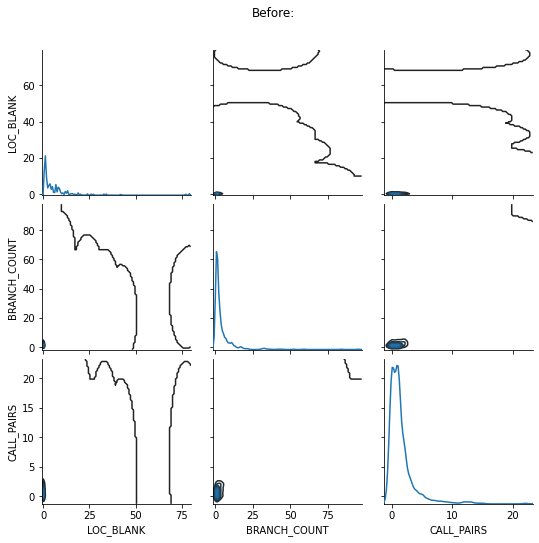

In [48]:
g = sns.PairGrid(X_train.iloc[:,:3].sample(600, random_state=RANDOM_SEED))
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Before:')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot);

In [27]:
X_test, y_test = X_test.drop('Defective', axis=1).values, X_test.Defective.values

In [28]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [29]:
X_test

array([[ 0.  ,  1.  ,  1.  , ...,  5.  , 66.67,  3.  ],
       [ 1.  ,  5.  ,  2.  , ...,  9.  ,  0.  ,  7.  ],
       [ 0.  ,  3.  ,  2.  , ...,  7.  , 80.  ,  5.  ],
       ...,
       [ 0.  ,  1.  ,  0.  , ...,  4.  , 50.  ,  2.  ],
       [13.  ,  1.  ,  3.  , ..., 40.  , 61.54, 11.  ],
       [ 0.  ,  1.  ,  1.  , ...,  5.  , 66.67,  3.  ]])

In [33]:
pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])
pipeline.fit(X_train)

Pipeline(steps=[('normalizer', Normalizer()), ('scaler', MinMaxScaler())])

In [34]:
X_train_transformed = pipeline.transform(X_train)
X_validate_transformed = pipeline.transform(X_validate)

In [39]:
X_train_transformed

array([[0.        , 0.01030095, 0.        , ..., 0.02398076, 0.30089521,
        0.03725721],
       [0.00771109, 0.00237203, 0.00147047, ..., 0.00673902, 0.0067203 ,
        0.00525567],
       [0.        , 0.03888775, 0.07210792, ..., 0.06037821, 0.75688117,
        0.07028847],
       ...,
       [0.        , 0.00945125, 0.01753557, ..., 0.01832802, 0.27609336,
        0.03418622],
       [0.00743203, 0.00177628, 0.        , ..., 0.0052272 , 0.0025714 ,
        0.00709167],
       [0.        , 0.00280555, 0.0033187 , ..., 0.00304136, 0.00858031,
        0.00554566]])

In [40]:
X_validate_transformed

array([[0.        , 0.03556403, 0.        , ..., 0.01377604, 0.        ,
        0.        ],
       [0.        , 0.08734614, 0.        , ..., 0.02257704, 0.        ,
        0.        ],
       [0.00836956, 0.00049471, 0.        , ..., 0.00581327, 0.00558399,
        0.00680647],
       ...,
       [0.        , 0.03879487, 0.07193574, ..., 0.01503065, 0.        ,
        0.        ],
       [0.00432941, 0.01038356, 0.00385279, ..., 0.008033  , 0.        ,
        0.01502232],
       [0.00485636, 0.00110741, 0.00093951, ..., 0.00299345, 0.00059524,
        0.00421268]])

In [44]:
column_names = ['LOC_BLANK',
 'BRANCH_COUNT',
 'CALL_PAIRS',
 'LOC_CODE_AND_COMMENT',
 'LOC_COMMENTS',
 'CONDITION_COUNT',
 'CYCLOMATIC_COMPLEXITY',
 'CYCLOMATIC_DENSITY',
 'DECISION_COUNT',
 'DESIGN_COMPLEXITY',
 'DESIGN_DENSITY',
 'EDGE_COUNT',
 'ESSENTIAL_COMPLEXITY',
 'ESSENTIAL_DENSITY',
 'LOC_EXECUTABLE',
 'PARAMETER_COUNT',
 'HALSTEAD_CONTENT',
 'HALSTEAD_DIFFICULTY',
 'HALSTEAD_EFFORT',
 'HALSTEAD_ERROR_EST',
 'HALSTEAD_LENGTH',
 'HALSTEAD_LEVEL',
 'HALSTEAD_PROG_TIME',
 'HALSTEAD_VOLUME',
 'MAINTENANCE_SEVERITY',
 'MODIFIED_CONDITION_COUNT',
 'MULTIPLE_CONDITION_COUNT',
 'NODE_COUNT',
 'NORMALIZED_CYLOMATIC_COMPLEXITY',
 'NUM_OPERANDS',
 'NUM_OPERATORS',
 'NUM_UNIQUE_OPERANDS',
 'NUM_UNIQUE_OPERATORS',
 'NUMBER_OF_LINES',
 'PERCENT_COMMENTS',
 'LOC_TOTAL']

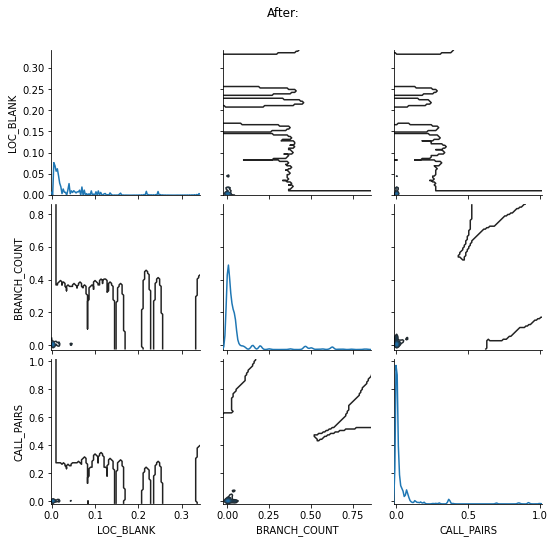

In [49]:
g = sns.PairGrid(pd.DataFrame(X_train_transformed, columns=column_names).iloc[:,:3].sample(600, random_state=RANDOM_SEED))
plt.subplots_adjust(top=0.9)
g.fig.suptitle('After:')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot)

In [51]:
%load_ext tensorboard
%tensorboard --logdir logs

In [58]:
input_dim = X_train_transformed.shape[1]
BATCH_SIZE = 256
EPOCHS = 100

autoencoder = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )), 
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(2, activation='elu'),
    
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')
    
])

autoencoder.compile(optimizer="adam", 
                    loss="mse",
                    metrics=["acc"])

autoencoder.summary();

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 36)                1332      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                592       
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_24 (Dense)             (None, 8)                

In [59]:
# current date and time
yyyymmddHHMM = datetime.now().strftime('%Y%m%d%H%M')

# new folder for a new run
log_subdir = f'{yyyymmddHHMM}_batch{BATCH_SIZE}_layers{len(autoencoder.layers)}'

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath='autoencoder_best_weights.hdf5',
    save_best_only=True,
    monitor='val_loss',
    verbose=0,
    mode='min'
)

tensorboard = tf.keras.callbacks.TensorBoard(
    f'logs/{log_subdir}',
    batch_size=BATCH_SIZE,
    update_freq='batch'
)

# callbacks argument only takes a list
cb = [early_stop, save_model, tensorboard]

In [60]:
history = autoencoder.fit(
    X_train_transformed, X_train_transformed,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=cb,
    validation_data=(X_validate_transformed, X_validate_transformed)
);

Epoch 1/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0585 - acc: 0.0121 - val_loss: 0.0485 - val_acc: 0.0116
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0407 - acc: 0.3073 - val_loss: 0.0293 - val_acc: 0.4302
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0242 - acc: 0.4324 - val_loss: 0.0179 - val_acc: 0.4309
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0161 - acc: 0.4298 - val_loss: 0.0130 - val_acc: 0.3627
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0121 - acc: 0.4108 - val_loss: 0.0107 - val_acc: 0.4109
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0104 - acc: 0.4145 - val_loss: 0.0098 - val_acc: 0.4277
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0096 - acc: 0.4161 - val_loss: 0.0093 - val_acc: 0.4186
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0092 - a

In [62]:
X_test_transformed = pipeline.transform(X_test)

In [63]:
reconstructions = autoencoder.predict(X_test_transformed)

In [64]:
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)
mse

array([4.78324776e-04, 4.31957350e-05, 7.40598608e-04, ...,
       3.80599517e-04, 7.88735678e-04, 5.02945374e-04])

In [65]:
clean = mse[y_test==0]
fraud = mse[y_test==1]

In [66]:
clean

array([4.78324776e-04, 4.31957350e-05, 7.40598608e-04, ...,
       4.00947452e-04, 7.88735678e-04, 5.02945374e-04])

In [67]:
fraud

array([6.86057099e-05, 7.41309852e-04, 1.39244366e-05, 2.29572376e-04,
       3.73059683e-04, 8.32779547e-05, 4.20382556e-05, 4.99201540e-04,
       3.17145355e-05, 2.02301595e-04, 1.84811389e-05, 9.59227182e-05,
       1.00659691e-03, 2.39340680e-05, 5.82904841e-05, 3.15854395e-05,
       1.22635055e-05, 2.06860596e-05, 3.73903905e-05, 2.09351250e-05,
       3.60218008e-05, 2.33555551e-05, 5.64182388e-05, 1.93864189e-05,
       2.18825958e-05, 1.54419609e-05, 2.83658195e-05, 2.82814503e-03,
       1.70444985e-05, 1.59978721e-05, 6.91942893e-05, 1.58459006e-05,
       2.35131904e-03, 1.15165660e-05, 1.08165901e-04, 3.71787400e-05,
       1.38844783e-05, 1.09317942e-03, 5.94753314e-05, 6.31526172e-05,
       3.85515782e-05, 6.82976403e-05, 7.25032863e-04, 2.80776909e-05,
       2.26342612e-05, 2.27572887e-03, 6.59020179e-05, 9.55350233e-05,
       5.68414021e-05, 2.00632951e-04, 6.64572269e-05, 5.34098759e-05,
       3.13005727e-05, 3.26169936e-05, 3.73761523e-04, 2.15115209e-05,
      

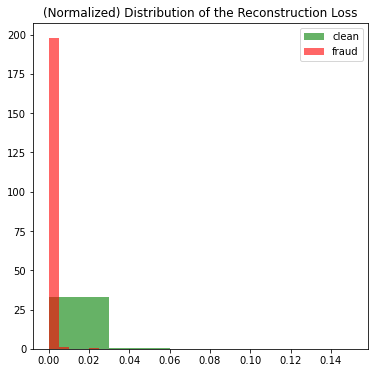

In [69]:
fig, ax = plt.subplots(figsize=(6,6))

ax.hist(clean, bins=5, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud, bins=5, density=True, label="fraud", alpha=.6, color="red")

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.legend()
plt.show()

In [72]:
THRESHOLD = 3

def mad_score(points):
    m = np.median(points)
    ad = np.abs(points - m)
    mad = np.median(ad)
    
    return 0.6745 * ad / mad

z_scores = mad_score(mse)
outliers = z_scores > THRESHOLD

In [73]:
cm = confusion_matrix(y_test, outliers)

(tn, fp, fn, tp) = cm.flatten()

In [74]:
tn

1145

In [75]:
fp

361

In [76]:
fn

420

In [77]:
tp

17

In [78]:
print("Accuracy percentage:", 100*(tp + tn)/(tp + tn + fp + fn), '%')

Accuracy percentage: 59.80442614513639 %
